In [11]:
library(dplyr)
library(caret)
library(lattice)
library(ggplot2)
library(qcc)
library(stats)
library(Hmisc)
library(car)
library(leaps)
library(outliers)
library(kknn)
library(knitr)
library(psych)
library(corrplot)
library(tidyverse)
library(cli)
library(devtools)
library(tree)
library(rpart)
library(pROC)
#library(pR2)
library(nnet)
library(foreign)
library(reshape2)

library(lattice)
library(ggplot2)

library(comprehenr)
library(gridExtra)
library(MASS)

setwd("~/Downloads/Datasets/7406/Project")

white <- read.csv(file = "winequality_white.csv", head = TRUE, sep=";")
whitef <- white

whitef$quality <- as.factor(white$quality)
str(whitef)
summary(whitef)
head(whitef)




Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : Factor w/ 7 levels "3","4","5","6",..: 4 4 4 4 4 4 4 4 4 4 ...


 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
                                                                    
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12,-0.11
volatile.acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07,-0.19
citric.acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08,-0.01
residual.sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45,-0.10
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36,-0.21
free.sulfur.dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,0.00,0.06,-0.25,0.01
total.sulfur.dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45,-0.17
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78,-0.31
pH,-0.43,-0.03,-0.16,-0.19,-0.09,0.00,0.00,-0.09,1.00,0.16,0.12,0.10
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02,0.05


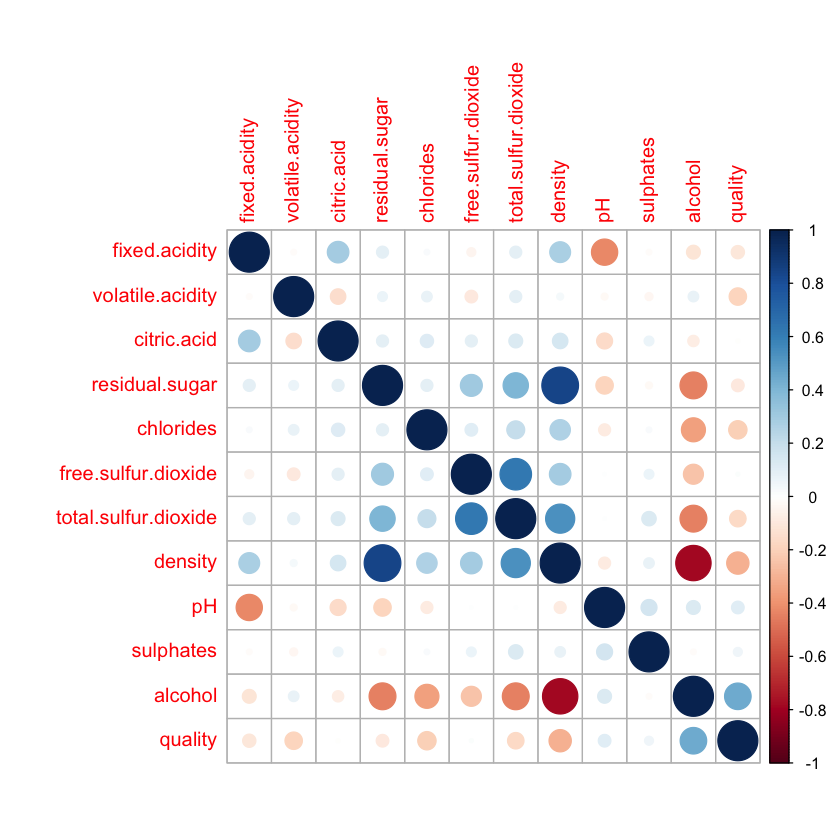

In [6]:
# Data exploration

white.cor = round(cor(white), 2)
white.cor
corrplot(white.cor)

# Strong correlation between:
# density - alcohol; ph - fixed adicity; alcohol - residual_sugar; alcohol - total_sufur_dioxide; 
# ph - fixed_acidity; density - residual_sugar, etc.

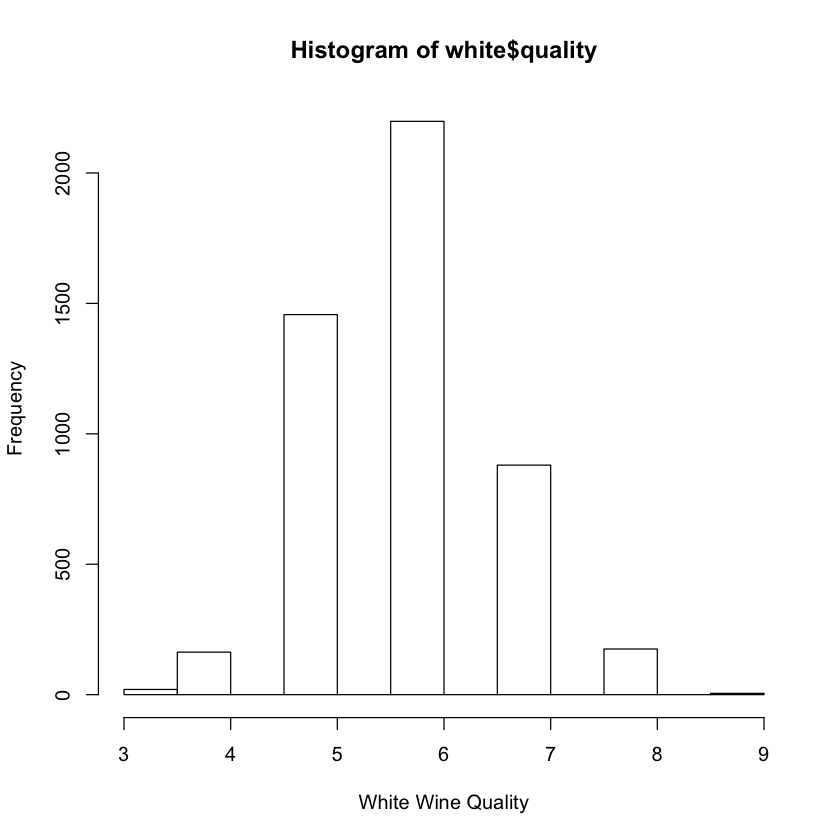

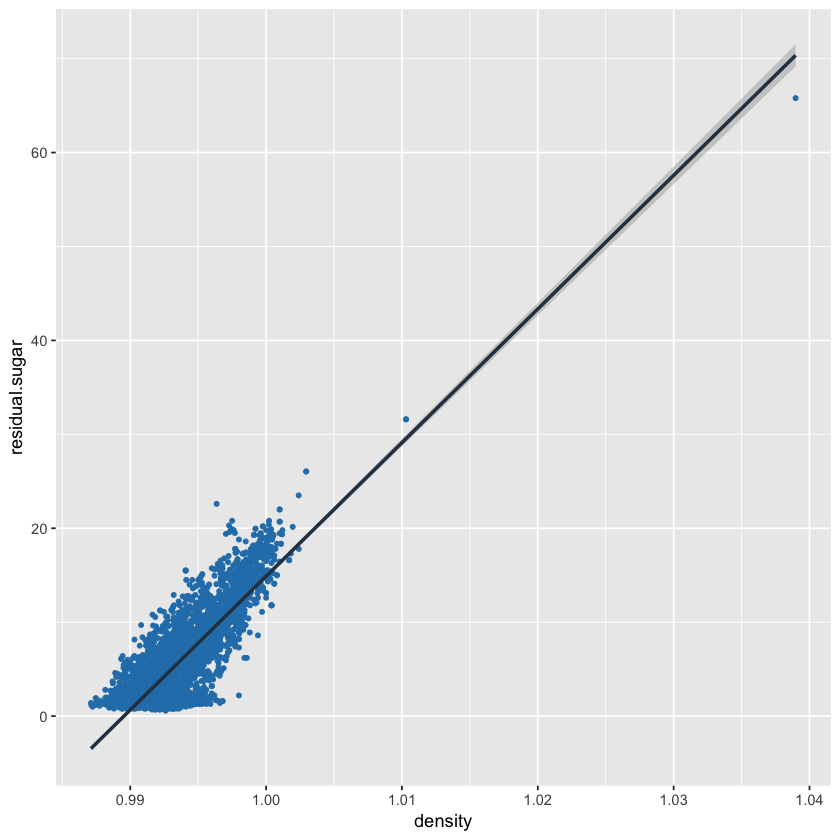

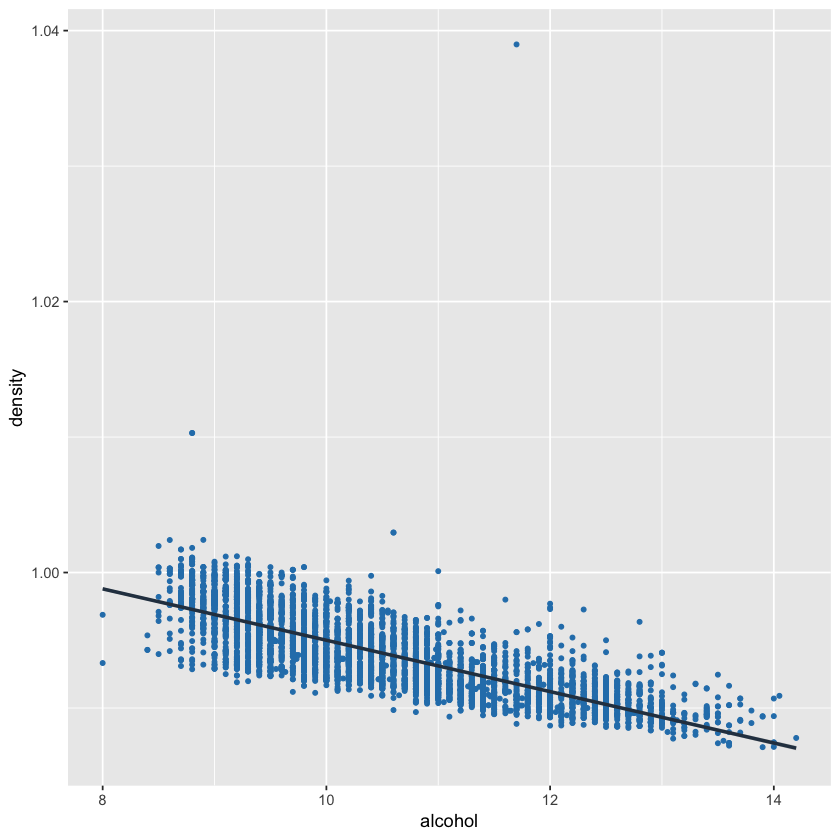

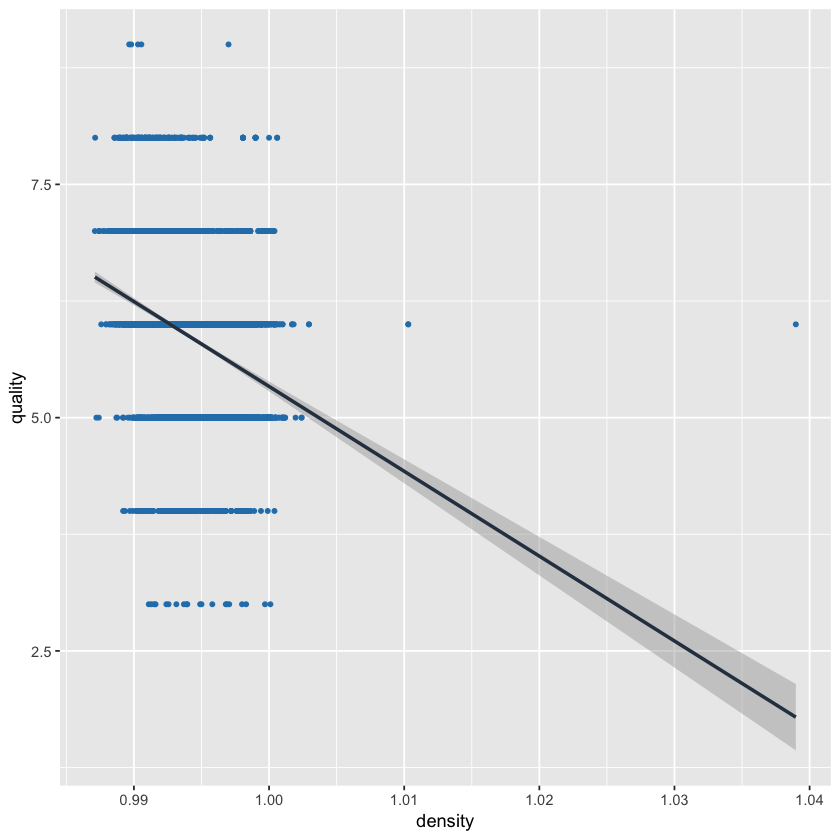

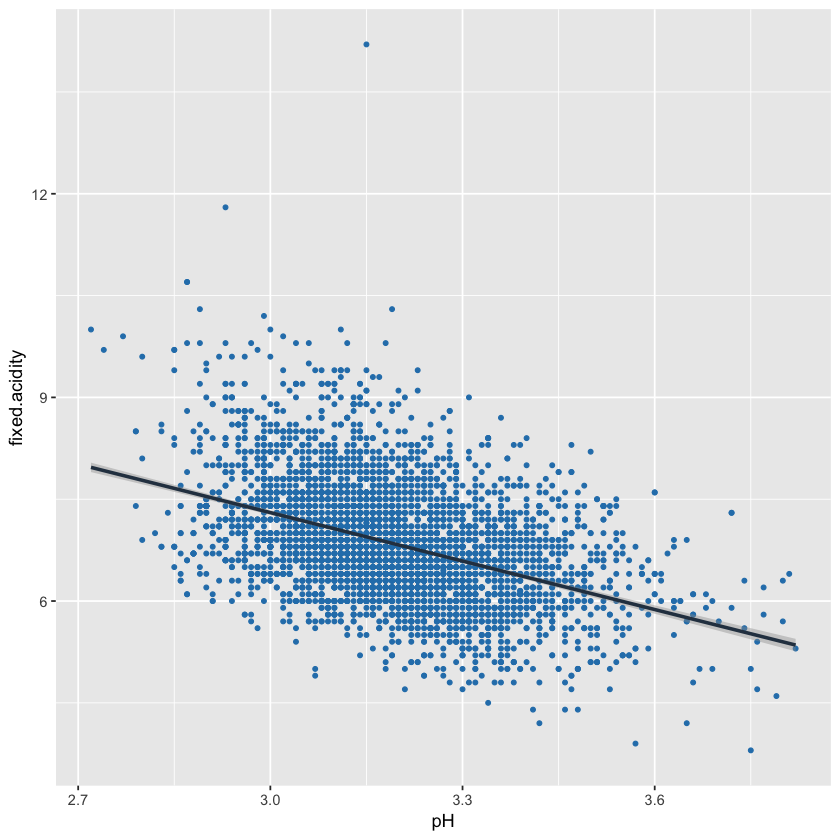

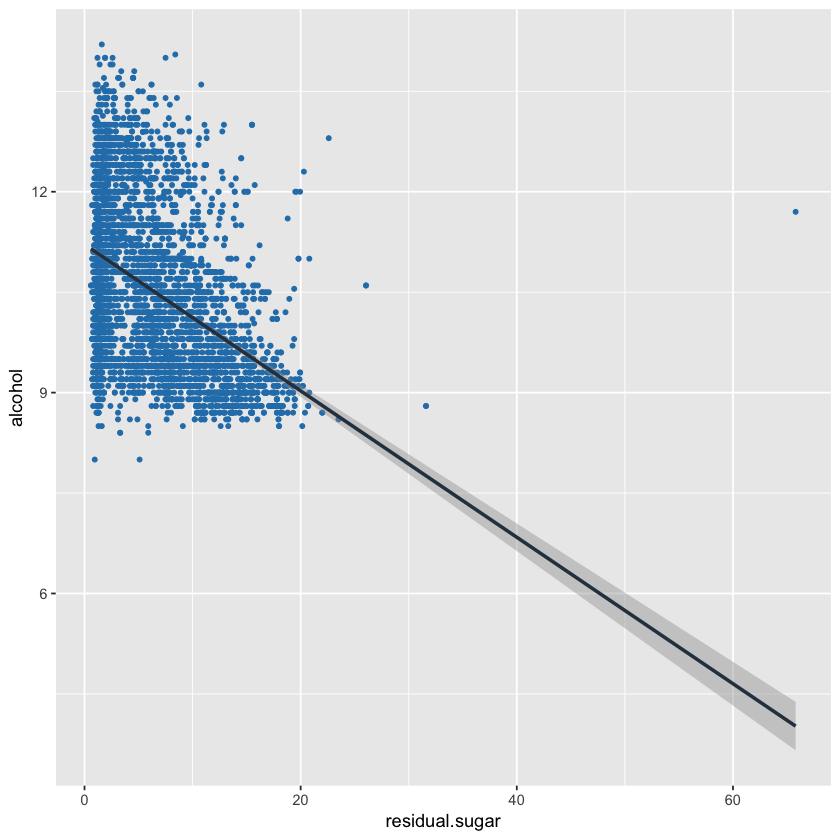

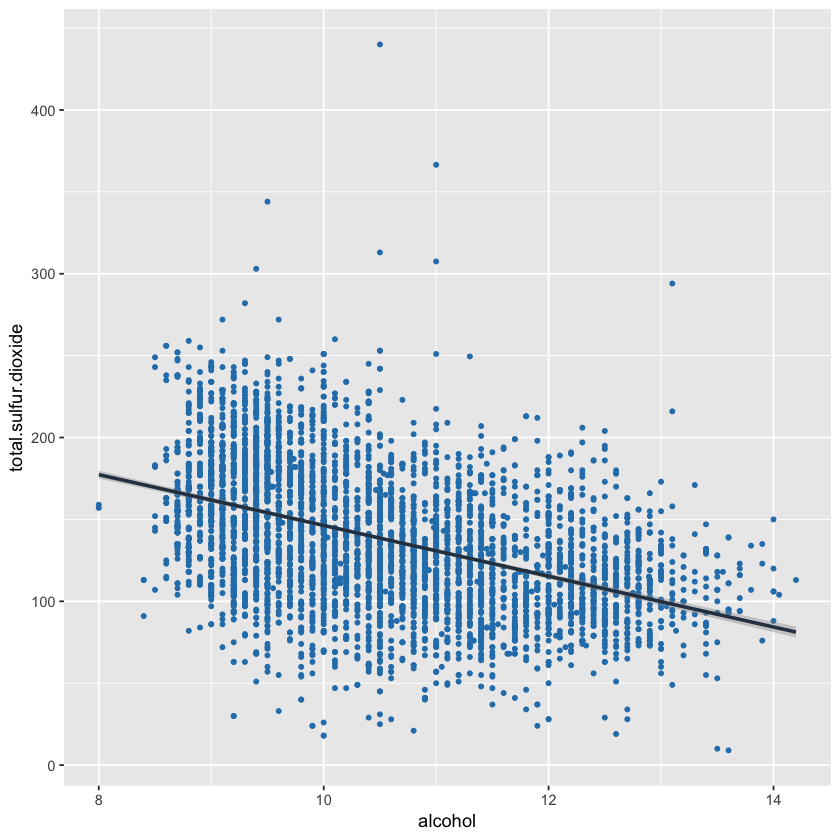

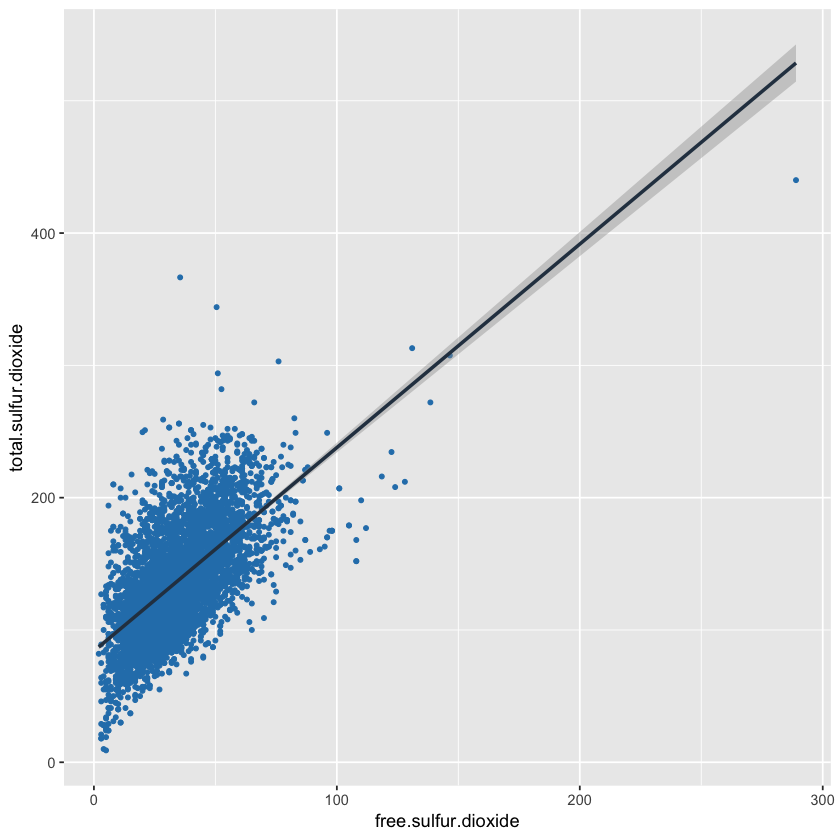

In [10]:
# Graphical Depiction

hist(white$quality, breaks = 11, xlab = "White Wine Quality")

ggplot(white, aes(x=density, y=residual.sugar)) + geom_point(color='#2980B9', size = 1) + 
  geom_smooth(method=lm, color='#2C3E50')

ggplot(white, aes(x=alcohol, y=density)) + geom_point(color='#2980B9', size = 1) + 
  geom_smooth(method=lm, color='#2C3E50')

ggplot(white, aes(x=density, y=quality)) + geom_point(color='#2980B9', size = 1) + 
  geom_smooth(method=lm, color='#2C3E50')

ggplot(white, aes(x=pH, y=fixed.acidity)) + geom_point(color='#2980B9', size = 1) + 
  geom_smooth(method=lm, color='#2C3E50')

ggplot(white, aes(x=residual.sugar, y=alcohol)) + geom_point(color='#2980B9', size = 1) + 
  geom_smooth(method=lm, color='#2C3E50')

ggplot(white, aes(x=alcohol, y=total.sulfur.dioxide)) + geom_point(color='#2980B9', size = 1) + 
  geom_smooth(method=lm, color='#2C3E50')

#ggplot(white, aes(x=free.sulfur.dioxide, y=quality)) + geom_point(color='#2980B9', size = 1) + 
#  geom_smooth(method=lm, color='#2C3E50')

ggplot(white, aes(x=free.sulfur.dioxide, y=total.sulfur.dioxide)) + geom_point(color='#2980B9', size = 1) + 
  geom_smooth(method=lm, color='#2C3E50')


In [22]:
# Ordinal Regression

ord_mod <- polr(quality ~., data = whitef, Hess = TRUE)
summary(ord_mod)



Call:
polr(formula = quality ~ ., data = whitef, Hess = TRUE)

Coefficients:
                          Value Std. Error    t value
fixed.acidity         2.314e-01  0.0382399     6.0519
volatile.acidity     -4.982e+00  0.3070888   -16.2231
citric.acid           1.238e-01  0.2425520     0.5105
residual.sugar        2.307e-01  0.0067782    34.0288
chlorides            -6.080e-01  1.3680802    -0.4444
free.sulfur.dioxide   1.193e-02  0.0022344     5.3394
total.sulfur.dioxide -9.073e-04  0.0009539    -0.9512
density              -4.623e+02  0.4622072 -1000.2653
pH                    2.068e+00  0.2125885     9.7296
sulphates             1.815e+00  0.2467479     7.3565
alcohol               4.299e-01  0.0314096    13.6865

Intercepts:
    Value      Std. Error t value   
3|4  -451.8844     0.4703  -960.8462
4|5  -449.5243     0.4686  -959.3262
5|6  -446.4853     0.4727  -944.6356
6|7  -443.8967     0.4816  -921.7026
7|8  -441.6433     0.4908  -899.7775
8|9  -437.9633     0.6607  -662.8714

Re

In [23]:
(ctable <- coef(summary(ord_mod)))

,Value,Std. Error,t value
fixed.acidity,2.314250e-01,0.0382398825,6.0519271
volatile.acidity,-4.981921e+00,0.3070888330,-16.2230629
citric.acid,1.238316e-01,0.2425520188,0.5105364
residual.sugar,2.306528e-01,0.0067781581,34.0288354
chlorides,-6.079880e-01,1.3680802087,-0.4444096
free.sulfur.dioxide,1.193042e-02,0.0022343930,5.3394444
total.sulfur.dioxide,-9.072691e-04,0.0009538567,-0.9511587
density,-4.623298e+02,0.4622071604,-1000.2653462
pH,2.068396e+00,0.2125885078,9.7295738
sulphates,1.815191e+00,0.2467479308,7.3564598


In [24]:
## calculate and store p values
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable <- cbind(ctable, "p value" = p))

,Value,Std. Error,t value,p value
fixed.acidity,2.314250e-01,0.0382398825,6.0519271,1.431233e-09
volatile.acidity,-4.981921e+00,0.3070888330,-16.2230629,3.464771e-59
citric.acid,1.238316e-01,0.2425520188,0.5105364,6.096757e-01
residual.sugar,2.306528e-01,0.0067781581,34.0288354,8.347247e-254
chlorides,-6.079880e-01,1.3680802087,-0.4444096,6.567465e-01
free.sulfur.dioxide,1.193042e-02,0.0022343930,5.3394444,9.323185e-08
total.sulfur.dioxide,-9.072691e-04,0.0009538567,-0.9511587,3.415238e-01
density,-4.623298e+02,0.4622071604,-1000.2653462,0.000000e+00
pH,2.068396e+00,0.2125885078,9.7295738,2.255359e-22
sulphates,1.815191e+00,0.2467479308,7.3564598,1.888517e-13


In [25]:
(ci <- confint(ord_mod)) # default method gives profiled CIs

Waiting for profiling to be done...


,2.5 %,97.5 %
fixed.acidity,0.114929794,0.3483715748
volatile.acidity,-5.585326795,-4.3813746622
citric.acid,-0.351335082,0.5997388732
residual.sugar,NA,NA
chlorides,-3.298607260,2.0703682462
free.sulfur.dioxide,0.007555726,0.0163150420
total.sulfur.dioxide,-0.002774925,0.0009604348
density,NA,NA
pH,1.498407027,2.6393418685
sulphates,1.332310232,2.2987447704


In [27]:
confint.default(ord_mod) # CIs assuming normality

# If the move from 2.5% to 97.% includes a zero (a sign change) then this coefficient is NOT statistically significant

,2.5 %,97.5 %
fixed.acidity,1.564762e-01,3.063738e-01
volatile.acidity,-5.583805e+00,-4.380038e+00
citric.acid,-3.515616e-01,5.992249e-01
residual.sugar,2.173679e-01,2.439378e-01
chlorides,-3.289376e+00,2.073400e+00
free.sulfur.dioxide,7.551087e-03,1.630975e-02
total.sulfur.dioxide,-2.776794e-03,9.622556e-04
density,-4.632357e+02,-4.614239e+02
pH,1.651730e+00,2.485061e+00
sulphates,1.331574e+00,2.298808e+00


In [29]:
## odds ratios - These coefficients are called proportional odds ratios
exp(cbind(OR = coef(ord_mod), ci))

,OR,2.5 %,97.5 %
fixed.acidity,1.260395e+00,1.121794678,1.41675858
volatile.acidity,6.860867e-03,0.003752523,0.01250815
citric.acid,1.131825e+00,0.703747901,1.82164306
residual.sugar,1.259422e+00,NA,NA
chlorides,5.444452e-01,0.036934572,7.92774194
free.sulfur.dioxide,1.012002e+00,1.007584343,1.01644886
total.sulfur.dioxide,9.990931e-01,0.997228922,1.00096090
density,1.631987e-201,NA,NA
pH,7.912119e+00,4.474555544,14.00398411
sulphates,6.142251e+00,3.789788574,9.96167042


In [31]:
# Let's rerun the regression with only significant predictors

ord_mods <- polr(quality ~. -citric.acid - chlorides - total.sulfur.dioxide, data = whitef, Hess = TRUE)
summary(ord_mods)

Call:
polr(formula = quality ~ . - citric.acid - chlorides - total.sulfur.dioxide, 
    data = whitef, Hess = TRUE)

Coefficients:
                         Value Std. Error  t value
fixed.acidity          0.08845   0.036514    2.422
volatile.acidity      -5.18835   0.293876  -17.655
residual.sugar         0.16504   0.006613   24.957
free.sulfur.dioxide    0.01061   0.001824    5.818
density             -279.78289   0.448624 -623.646
pH                     1.42943   0.209094    6.836
sulphates              1.51718   0.244129    6.215
alcohol                0.66012   0.028939   22.811

Intercepts:
    Value     Std. Error t value  
3|4 -271.5581    0.4550  -596.8872
4|5 -269.2068    0.4535  -593.5860
5|6 -266.1775    0.4582  -580.8577
6|7 -263.6063    0.4676  -563.7887
7|8 -261.3599    0.4770  -547.9438
8|9 -257.6819    0.6504  -396.2090

Residual Deviance: 10914.19 
AIC: 10942.19 

In [33]:
(ctable1 <- coef(summary(ord_mods)))

,Value,Std. Error,t value
fixed.acidity,0.08844812,0.036514402,2.422280
volatile.acidity,-5.18834791,0.293876437,-17.654862
residual.sugar,0.16503877,0.006612975,24.956810
free.sulfur.dioxide,0.01061295,0.001824224,5.817790
density,-279.78288665,0.448624360,-623.646221
pH,1.42942578,0.209093822,6.836289
sulphates,1.51717819,0.244128602,6.214668
alcohol,0.66011662,0.028939107,22.810538
3|4,-271.55807062,0.454957138,-596.887152
4|5,-269.20677773,0.453526161,-593.585996


In [34]:
## calculate and store p values
p <- pnorm(abs(ctable1[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable1 <- cbind(ctable1, "p value" = p))

,Value,Std. Error,t value,p value
fixed.acidity,0.08844812,0.036514402,2.422280,1.542345e-02
volatile.acidity,-5.18834791,0.293876437,-17.654862,9.336177e-70
residual.sugar,0.16503877,0.006612975,24.956810,1.801193e-137
free.sulfur.dioxide,0.01061295,0.001824224,5.817790,5.963062e-09
density,-279.78288665,0.448624360,-623.646221,0.000000e+00
pH,1.42942578,0.209093822,6.836289,8.127094e-12
sulphates,1.51717819,0.244128602,6.214668,5.143331e-10
alcohol,0.66011662,0.028939107,22.810538,3.603960e-115
3|4,-271.55807062,0.454957138,-596.887152,0.000000e+00
4|5,-269.20677773,0.453526161,-593.585996,0.000000e+00


In [36]:
(ci1 <- confint(ord_mods)) # default method gives profiled CIs

Waiting for profiling to be done...


ERROR: Error in profile.polr(object, which = parm, alpha = (1 - level)/4, trace = trace): profiling has found a better solution, so original fit had not converged


In [39]:
ci1 <- confint.default(ord_mods) # CIs assuming normality
ci1

# All predictors are significant

,2.5 %,97.5 %
fixed.acidity,1.688120e-02,0.16001503
volatile.acidity,-5.764335e+00,-4.61236068
residual.sugar,1.520776e-01,0.17799996
free.sulfur.dioxide,7.037539e-03,0.01418836
density,-2.806622e+02,-278.90359906
pH,1.019609e+00,1.83924214
sulphates,1.038695e+00,1.99566145
alcohol,6.033970e-01,0.71683622


In [40]:
## odds ratios - These coefficients are called proportional odds ratios
exp(cbind(OR = coef(ord_mods), ci1))

,OR,2.5 %,97.5 %
fixed.acidity,1.092478e+00,1.017024e+00,1.173529e+00
volatile.acidity,5.581220e-03,3.137481e-03,9.928353e-03
residual.sugar,1.179439e+00,1.164251e+00,1.194825e+00
free.sulfur.dioxide,1.010669e+00,1.007062e+00,1.014289e+00
density,3.103389e-122,1.288150e-122,7.476631e-122
pH,4.176300e+00,2.772112e+00,6.291768e+00
sulphates,4.559341e+00,2.825527e+00,7.357068e+00
alcohol,1.935018e+00,1.828319e+00,2.047944e+00


In [41]:
# Proportional Odds

sf <- function(y) {
  c('Y>=0' = qlogis(mean(y >= 0)),
    'Y>=1' = qlogis(mean(y >= 1)),
    'Y>=2' = qlogis(mean(y >= 2)),
    'Y>=3' = qlogis(mean(y >= 3)),
    'Y>=4' = qlogis(mean(y >= 4)),
    'Y>=6' = qlogis(mean(y >= 6)),
    'Y>=7' = qlogis(mean(y >= 7)),
    'Y>=8' = qlogis(mean(y >= 8)),
    'Y>=9' = qlogis(mean(y >= 9)))
}

(s <- with(whitef, summary(as.numeric(quality) ~ fixed.acidity + volatile.acidity + residual.sugar + 
                           free.sulfur.dioxide + density + pH + sulphates + alcohol, fun=sf)))

as.numeric(quality)     N= 4898 

+-------------------+-------------+----+----+----+--------+--------+----------+---------+---------+----+----+
|                   |             |N   |Y>=0|Y>=1|Y>=2    |Y>=3    |Y>=4      |Y>=6     |Y>=7     |Y>=8|Y>=9|
+-------------------+-------------+----+----+----+--------+--------+----------+---------+---------+----+----+
|fixed.acidity      |[3.8, 6.4)   |1295|Inf |Inf |5.552960|3.347509| 0.9087354|-3.194262|     -Inf|-Inf|-Inf|
|                   |[6.4, 6.9)   |1340|Inf |Inf |6.505784|3.534071| 0.6553229|-3.336852|-7.199678|-Inf|-Inf|
|                   |[6.9, 7.4)   |1059|Inf |Inf |5.863631|3.318599| 0.7837915|-2.904414|-6.270043|-Inf|-Inf|
|                   |[7.4,14.2]   |1204|Inf |Inf |4.782479|2.879900| 0.4179393|-3.737670|-6.398595|-Inf|-Inf|
+-------------------+-------------+----+----+----+--------+--------+----------+---------+---------+----+----+
|volatile.acidity   |[0.080,0.215)|1314|Inf |Inf |6.486161|4.120198| 1.4335776|-3.1119

In [43]:
# Example

glm(I(as.numeric(quality) >= 4) ~ density, family ="binomial", data = whitef)


Call:  glm(formula = I(as.numeric(quality) >= 4) ~ density, family = "binomial", 
    data = whitef)

Coefficients:
(Intercept)      density  
      203.9       -204.4  

Degrees of Freedom: 4897 Total (i.e. Null);  4896 Residual
Null Deviance:	    6245 
Residual Deviance: 5879 	AIC: 5883

In [46]:
s[, 4] <- s[, 4] - s[, 3]
s[, 3] <- s[, 3] - s[, 3]
s

as.numeric(quality)     N= 4898 

+-------------------+-------------+----+----+----+----+--------+----------+---------+---------+----+----+
|                   |             |N   |Y>=0|Y>=1|Y>=2|Y>=3    |Y>=4      |Y>=6     |Y>=7     |Y>=8|Y>=9|
+-------------------+-------------+----+----+----+----+--------+----------+---------+---------+----+----+
|fixed.acidity      |[3.8, 6.4)   |1295|Inf |    |    |3.347509| 0.9087354|-3.194262|     -Inf|-Inf|-Inf|
|                   |[6.4, 6.9)   |1340|Inf |    |    |3.534071| 0.6553229|-3.336852|-7.199678|-Inf|-Inf|
|                   |[6.9, 7.4)   |1059|Inf |    |    |3.318599| 0.7837915|-2.904414|-6.270043|-Inf|-Inf|
|                   |[7.4,14.2]   |1204|Inf |    |    |2.879900| 0.4179393|-3.737670|-6.398595|-Inf|-Inf|
+-------------------+-------------+----+----+----+----+--------+----------+---------+---------+----+----+
|volatile.acidity   |[0.080,0.215)|1314|Inf |    |    |4.120198| 1.4335776|-3.111927|     -Inf|-Inf|-Inf|
|           

ERROR: Error in plot.window(...): нужны конечные значения 'xlim'


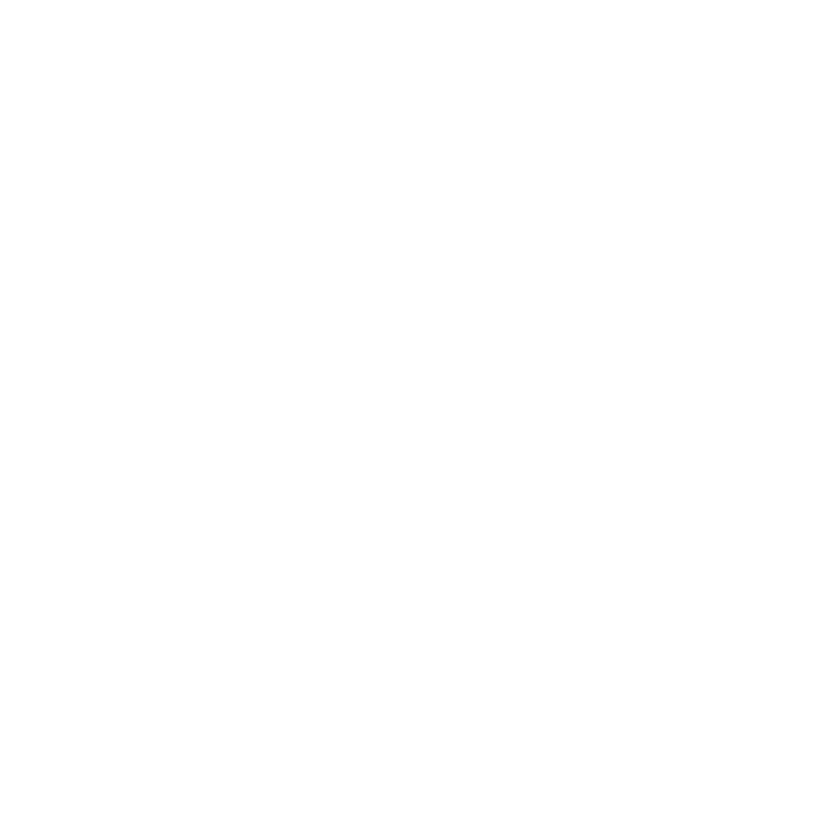

In [44]:
glm(I(as.numeric(quality) >= 6) ~ density, family ="binomial", data = whitef)


Call:  glm(formula = I(as.numeric(quality) >= 6) ~ density, family = "binomial", 
    data = whitef)

Coefficients:
(Intercept)      density  
      252.1       -257.1  

Degrees of Freedom: 4897 Total (i.e. Null);  4896 Residual
Null Deviance:	    1543 
Residual Deviance: 1464 	AIC: 1468

In [66]:
# Linear Regression

set.seed(6501)

nobs <- nrow(white)
spl <- 0.8

shuffle_index <- sample(1:nobs)
white <- white[shuffle_index, ]

train_indices = sample(1:nobs, nobs * spl)

train = white[train_indices,] 
test = white[-train_indices,]

mod1 = lm(quality ~. - chlorides - total.sulfur.dioxide ,data = train) 
summary(mod1)

kv <- 9
ad <- 2*kv*(kv+1)/(nrow(train)-kv-1)
aic_ad1 <- round(AIC(mod1) + ad,1)
bic1 <- round(BIC(mod1),1)

print(paste('AIC = ', aic_ad1, '   BIC = ', bic1))





Call:
lm(formula = quality ~ . - chlorides - total.sulfur.dioxide, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7514 -0.5040 -0.0328  0.4623  3.1285 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.403e+02  1.958e+01   7.166 9.21e-13 ***
fixed.acidity        4.748e-02  2.254e-02   2.106   0.0352 *  
volatile.acidity    -1.889e+00  1.242e-01 -15.212  < 2e-16 ***
citric.acid         -9.342e-03  1.065e-01  -0.088   0.9301    
residual.sugar       7.933e-02  7.954e-03   9.974  < 2e-16 ***
free.sulfur.dioxide  3.094e-03  7.485e-04   4.134 3.64e-05 ***
density             -1.400e+02  1.985e+01  -7.052 2.08e-12 ***
pH                   5.575e-01  1.144e-01   4.871 1.15e-06 ***
sulphates            6.075e-01  1.125e-01   5.402 6.98e-08 ***
alcohol              2.132e-01  2.616e-02   8.151 4.82e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7504 on 3908 deg

[1] "AIC =  8881.2    BIC =  8950.2"
